Coded by: RJAcostAmado

Adapted by: Arnold Charry

Operaciones I

Departamento de Ingeniería Industrial

Universidad ICESI

If you are not familiar with them, then go ahead and do your research on the following python libraries that are going to be required in this notebook to perform the ABC classification.  Just for the record, this are the libraries:


*   numpy
*   pandas
*   io


What are these libraries useful for?  Discuss this with your fellow team members based on the findings from your research.


In [ ]:
import numpy as np
import pandas as pd
import io

Let´s now read the data that is located in the csv file from kaggle you can find in [this](https://www.kaggle.com/code/danavg/abc-analysis-of-active-inventory/data?select=SalesKaggle3.csv) link.  Go ahead and download the corresponding data file, and place it in a reachable folder in your machine.  The first two lines of code from the following cell will interact with you by creating a button for you to choose your csv data file.

In [ ]:
from google.colab import drive
data = pd.read_csv("/content/drive/MyDrive/VT 2018-2022 V2.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's see how many rows and columns we have in this file

In [ ]:
data

,Código,Descripción,Cantidad,Monto Bruto,Descuentos,I.V.A 19%,IPOCONSUM,Costo,Utilidad,%Utilidad
0,0001,0001SHORT SUPLE UNICOLOR,813,1.400746e+07,86702.428,2.480258e+06,0.0,4.292663e+07,-2.900586e+07,-207.074359
1,0002,Short suplex Estampado,2822,6.311471e+07,283667.704,1.102098e+07,0.0,4.363540e+07,1.919565e+07,30.413907
2,000330,0330 V. BAÑO,2,8.403362e+04,0.000,1.596638e+04,0.0,6.400000e+04,2.003362e+04,23.840006
3,000331,0331 V. BAÑO,2,9.243698e+04,0.000,1.756302e+04,0.0,5.300000e+04,3.943698e+04,42.663640
4,000338,FALDA SALIDA BAÑO 338,2,4.451260e+04,0.000,8.457400e+03,0.0,4.540000e+04,-8.874000e+02,-1.993593
...,...,...,...,...,...,...,...,...,...,...
594,Z5,MASCARILLA ARNET,311,2.188000e+06,0.000,0.000000e+00,0.0,1.492800e+06,6.952000e+05,31.773309
595,Z6,MASCARILLA SIMPLEABATIBLE,2195,2.043360e+07,0.000,0.000000e+00,0.0,1.185300e+07,8.580600e+06,41.992600
596,Z7,MASCARILLA SOPORTE AZUL,183,1.693950e+06,0.000,0.000000e+00,0.0,1.281000e+06,4.129500e+05,24.377933
597,Z8,TAPA BOCAS 3 CAPAS AZUL,66,1.922550e+06,0.000,0.000000e+00,0.0,2.587192e+06,-6.646420e+05,-34.570858


drop the rows with ItemCount = 0 and drop the rows with PriceReg = 0.  These result in total cost equal to zero and so they are not good for what we want to do because it requires the total cost to be different than zero.  Also, let´s drop the rows corresponding to the items that are not active; which are those that are 'Historical'.

In [ ]:
idxsToDropOne = data.index[data['Cantidad'] == 0].tolist()
idxsToDropTwo = data.index[data['Costo'] == 0].tolist()
idxsToDrop = idxsToDropOne + idxsToDropTwo
data = data.drop(data.index[idxsToDrop])

Let´s see now the new number of rows and columns of the data we´ve uploaded

In [ ]:
data.shape

(593, 10)

The following line of code will print the headers of the csv file.  Let´s make sure we are reading what we want to read.

In [ ]:
data.head()

,Código,Descripción,Cantidad,Monto Bruto,Descuentos,I.V.A 19%,IPOCONSUM,Costo,Utilidad,%Utilidad
0,0001,0001SHORT SUPLE UNICOLOR,813,1.400746e+07,86702.428,2.480258e+06,0.0,4.292663e+07,-2.900586e+07,-207.074359
1,0002,Short suplex Estampado,2822,6.311471e+07,283667.704,1.102098e+07,0.0,4.363540e+07,1.919565e+07,30.413907
2,000330,0330 V. BAÑO,2,8.403362e+04,0.000,1.596638e+04,0.0,6.400000e+04,2.003362e+04,23.840006
3,000331,0331 V. BAÑO,2,9.243698e+04,0.000,1.756302e+04,0.0,5.300000e+04,3.943698e+04,42.663640
4,000338,FALDA SALIDA BAÑO 338,2,4.451260e+04,0.000,8.457400e+03,0.0,4.540000e+04,-8.874000e+02,-1.993593


In [ ]:
data.tail()

,Código,Descripción,Cantidad,Monto Bruto,Descuentos,I.V.A 19%,IPOCONSUM,Costo,Utilidad,%Utilidad
594,Z5,MASCARILLA ARNET,311,2188000.0,0.0,0.0,0.0,1492800.00,695200.00,31.773309
595,Z6,MASCARILLA SIMPLEABATIBLE,2195,20433600.0,0.0,0.0,0.0,11853000.00,8580600.00,41.992600
596,Z7,MASCARILLA SOPORTE AZUL,183,1693950.0,0.0,0.0,0.0,1281000.00,412950.00,24.377933
597,Z8,TAPA BOCAS 3 CAPAS AZUL,66,1922550.0,0.0,0.0,0.0,2587192.03,-664642.03,-34.570858
598,Z9,TAPABOCAS PICO LORO SESGO,11,360000.0,0.0,0.0,0.0,390500.00,-30500.00,-8.472222


Let´s create a subset of these data as there are some columns we are not going to use for our purpose. We need the SKU_number, the PriceReg, the ItemCount.  That´s all we need to perform our ABC classification.

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
dataSubset = data[['Código', 'Cantidad', 'Costo']]

Now, let´s see how many rows and columns we´ve got ourselves with that line of code.  This is just to make sure changes were performed; as a way of tracking them.

In [ ]:
dataSubset

,Código,Cantidad,Costo
0,0001,813,4.292663e+07
1,0002,2822,4.363540e+07
2,000330,2,6.400000e+04
3,000331,2,5.300000e+04
4,000338,2,4.540000e+04
...,...,...,...
588,Z5,311,1.492800e+06
589,Z6,2195,1.185300e+07
590,Z7,183,1.281000e+06
591,Z8,66,2.587192e+06


Also, let´s request the info on our sub set of data.  When you request the data info, you´ll see the column headers, how many rows they have, how many non null elements there are in each and the type of data these elements are. Also, you'll see how much memory it takes.

In [ ]:
dataSubset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Código    593 non-null    object 
 1   Cantidad  593 non-null    int64  
 2   Costo     593 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.0+ KB


Now, let´s determine how many duplicates we have in the rows of our data base.

In [ ]:
dataSubset.duplicated().sum()

0

Now, we need to create a new column to store, for each row, the total cost for each item. This cost is given by the price time the count of the item.

Now we have one more column.  You can double check it by running the following line of code

In [ ]:
dataSubset.shape

(593, 3)

In [ ]:
dataSubset.sample(10)

,Código,Cantidad,Costo
453,C155,167,3.508352e+06
408,B001,456,5.468675e+06
315,7025,496,2.211959e+07
367,A338,20,7.563000e+05
55,0218,582,2.954995e+06
545,W4008,20,9.012361e+05
405,A7025,60,2.470560e+06
352,A155,1691,5.591059e+07
84,0359,19,2.720550e+05
426,B237,151,1.268853e+06


Let´s now sort the data in descending order according to the totalCost

In [ ]:
dataSubsetSorted = dataSubset.sort_values(by = ['Costo'], ascending = False)
dataSubsetSorted

,Código,Cantidad,Costo
44,0182,11368,3.304299e+08
40,0155,2639,6.259700e+07
474,D4012,3391,5.884995e+07
352,A155,1691,5.591059e+07
21,0047,2389,5.448400e+07
...,...,...,...
174,419ANA,30,2.306844e+04
133,301,1,1.890750e+04
134,302,2,1.680600e+04
392,A6038,1,1.600340e+04


Add a new column for the cummulative costs

In [ ]:
dataSubsetSorted['cummulativeCost'] = dataSubsetSorted['Costo'].cumsum()

Let´s display the current state of our data table

In [ ]:
dataSubsetSorted

,Código,Cantidad,Costo,cummulativeCost
44,0182,11368,3.304299e+08,3.304299e+08
40,0155,2639,6.259700e+07,3.930269e+08
474,D4012,3391,5.884995e+07,4.518768e+08
352,A155,1691,5.591059e+07,5.077874e+08
21,0047,2389,5.448400e+07,5.622714e+08
...,...,...,...,...
174,419ANA,30,2.306844e+04,3.749076e+09
133,301,1,1.890750e+04,3.749095e+09
134,302,2,1.680600e+04,3.749111e+09
392,A6038,1,1.600340e+04,3.749127e+09


The total cost is the last element of the column cummulativeCost.  We´ll need that number to work out the relative cummulative costs.

In [ ]:
totalCosts = dataSubsetSorted['cummulativeCost'].iloc[-1]

Let´s now work out the column for the relative cummulative costs and lets take a look at the current state of our table.

In [ ]:
dataSubsetSorted['relativeCost'] = dataSubsetSorted['cummulativeCost'] / totalCosts
dataSubsetSorted.sample(50)

,Código,Cantidad,Costo,cummulativeCost,relativeCost
427,B264,22,3.591873e+05,3.736573e+09,0.996648
400,A7012,40,1.613440e+06,3.596011e+09,0.959157
166,4031,291,7.897034e+06,2.695121e+09,0.718864
462,C6-045,80,1.410412e+06,3.628878e+09,0.967923
527,W1011,32,1.819998e+06,3.558947e+09,0.949271
285,6069,262,3.742730e+06,3.236165e+09,0.863176
519,P281,34,3.111810e+05,3.740258e+09,0.997631
295,7003,71,1.551210e+06,3.602341e+09,0.960845
376,A4014,63,2.117605e+06,3.527096e+09,0.940775
162,4027,169,6.442141e+06,2.880748e+09,0.768376


Now, we are ready to actually conduct the ABC classification with the following snippet of code.  It defines a function that takes a column with cummulative percentages (*cumPer*) and according to its values decides whether the class is A, B or C for each of its entries.

In [ ]:
def ABC(cumPer):
    if cumPer > 0 and cumPer < 0.6:
        return 'A'
    elif cumPer >= 0.6 and cumPer < 0.85:
        return 'B'
    elif cumPer >= 0.85:
        return 'C'

Let´s now define a new column on our data frame to store the class each SKU belongs to.

In [ ]:
dataSubsetSorted['Class'] = dataSubsetSorted['relativeCost'].apply(ABC)

In [ ]:
dataSubsetSorted.sample(20)

,Código,Cantidad,Costo,cummulativeCost,relativeCost,Class
48,0194,297,7.919121e+06,2.679316e+09,0.714648,B
396,A6050,135,2.504992e+06,3.474488e+09,0.926743,C
529,W2002,3,1.411568e+05,3.746749e+09,0.999363,C
1,0002,2822,4.363540e+07,7.517381e+08,0.200510,A
219,5059,671,6.203910e+06,2.912337e+09,0.776802,B
329,7040,653,2.030332e+07,1.630673e+09,0.434946,A
398,A7001,183,7.699367e+06,2.726071e+09,0.727119,B
448,C012,122,6.151240e+05,3.715175e+09,0.990941,C
580,Z14,4,1.155200e+04,3.749139e+09,1.000000,C
237,6018,364,1.664743e+07,1.924654e+09,0.513359,A


In [ ]:
 dataSubsetSorted[dataSubsetSorted.Cantidad == 121]

,Código,Cantidad,Costo,cummulativeCost,relativeCost,Class
137,4002,121,3.536678e+06,3.279330e+09,0.874689,C
410,B012,121,1.427503e+06,3.624636e+09,0.966792,C


And now let´s count the number of elements of each class.

In [ ]:
dataSubsetSorted.Class.value_counts()

C    384
B    131
A     78
Name: Class, dtype: int64

Now, how about you saving your results as a .csv file?  Note that the name of the file will be ABC.csv. That is something you can change in case you want to.

In [ ]:
from google.colab import files
dataSubsetSorted.to_csv('Arany Sport - ABC Classification.csv')
files.download('Arany Sport - ABC Classification.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dataSubsetSorted.to_excel("Arany Sport - ABC Classification.xlsx", index = False)
dataSubsetSorted.to_csv("Arany Sport - ABC Classification", index = False)

You can also print the percentages of each class from the cost perspective.  The following snippet of code will help you do that.

In [ ]:
print('Cost percentage of class A:',dataSubsetSorted[dataSubsetSorted.Class == 'A']['Costo'].sum()/totalCosts)
print('Cost percentage of class B:',dataSubsetSorted[dataSubsetSorted.Class == 'B']['Costo'].sum()/totalCosts)
print('Cost percentage of class C:',dataSubsetSorted[dataSubsetSorted.Class == 'C']['Costo'].sum()/totalCosts)

Cost percentage of class A: 0.5998570148698092
Cost percentage of class B: 0.2500811299135663
Cost percentage of class C: 0.150061855216625


It is also useful to know the number of items in each category.  You can do that with the following line of code.  Go ahead and running it and see the results!

In [ ]:
dataSubsetSorted['Class'].value_counts()

C    384
B    131
A     78
Name: Class, dtype: int64

There might be different ways to print this information on your screen or as a .csv file. Go ahead and team up with your classmates to come up with a different form of printing these results!

Now you can also plot the cummulative relative costs to see the behavior of the curve and come up with a better understanding on where the cuts for the A, B and C classes should be.  In order for you to understand the use_index argument of the following function, you can take a look at <a href="https://www.statology.org/pandas-plot-index/"> this</a> explanation.

<Axes: >

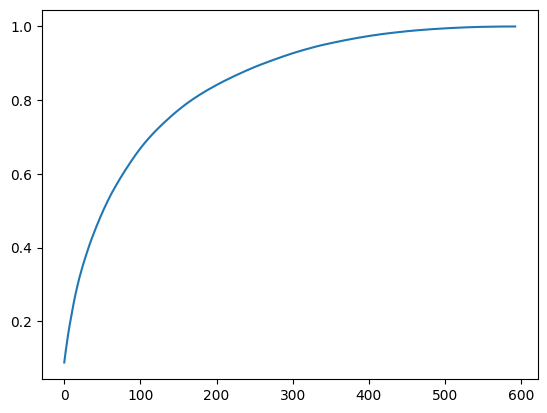

In [ ]:
dataSubsetSorted.relativeCost.plot(use_index = False)
# dataSubsetSorted.relativeCost.plot()